

# Project: Investigate a Dataset - [No show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> Columns:

> 1-'Patient ID' every patient has a unique ID

> 2-'Appointment_ID' a patient can have more than one appointment ID

> 3-'Gender' M for male and F for female

> 4-'ScheduledDay' tells us on what day the patient set up their appointment.

> 5-'AppointmentDay' tells us the actual day the patient came for appointment.

> 6-'Age' it provides the age of the patient

> 7-'Neighborhood' indicates the location of the hospital.

> 8-'Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

> 9-'Hipertension' it should be edited to be Hypertension which is high blood pressure, 1 means has Hypertension 0 means no
Hypertension

> 10-'Diabetes' 1 means has Diabetes 0 means no Diabetes

> 11-'Alcoholism'

> 12-'Handcap' it should be renamed to be 'Handicap'

> 13-'SMS_received' 1 means the patient had recieved SMS 0 means he didn't

> 14-'No-show' No means the patient showed up while yes means he didn't show up



### Question(s) for Analysis
>Q1:Does gender affect showing up

>Q2:What is the age distribution and does it affect showing up?

>Q3:What are the most showing up neighbourhoods ?

>Q4:Does patients with more conditions(Diabetes,Hypertension,Handicap,Alcoholism) tend to show up more for appointments?

>Q5:What is the most showing up Day of week?

>Q6:What is the average waiting days and does long waiting days have a negative effect on showing up?



In [1]:
#Setting up import statements for all of the packages that I plan to use.
import pandas as pd
import numpy as npo
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Loading data and printing out a few lines. 
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#checking the number of columns and rows and whether there are missing values or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset contains 110527 rows and 14 columns and there is no missing values in any of the columnn

In [4]:
#checking for duplicates
df.duplicated().sum()

0

Great! there's no duplicate rows in our data

In [5]:
#checking the uniqueness of columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])

There's only 62299 unique patients in this dataset which means some patients had more than one appoinment. -
Handicap should be a boolean but instead it contains 5 unique values so we need to fix this in the cleaning

In [7]:
#getting quick insights about our dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Every thing is looking fine but the minimum age is -1 ! which is impossible so, we need to check how many rows contain an age below zero to decide whether to drop them or to replace the age with the mean or median

In [8]:
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Since we found only one row, it won't affect the data if we dropped it in the cleaning section

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa846f8e748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa846e06048>]], dtype=object)

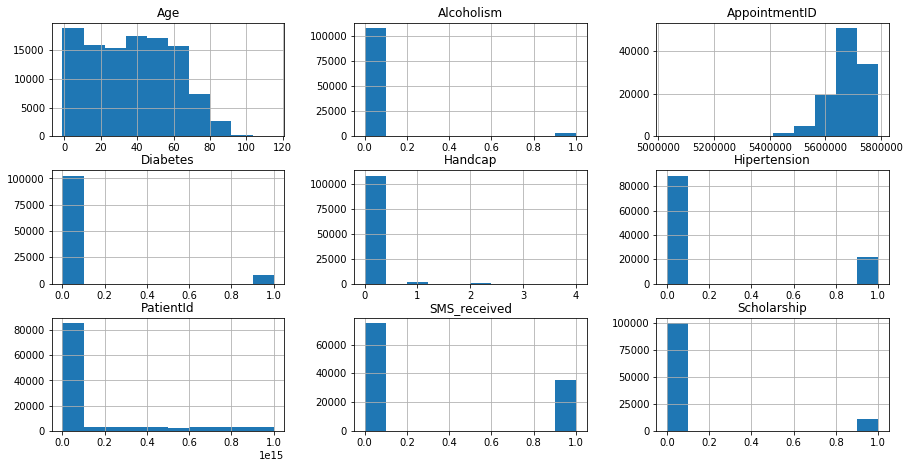

In [9]:
df.hist(figsize=(15,7.5))

These histograms shows us a brief about the data and it's distribution
Age is skewed to the right , majority of patients has no diabetes, not alcoholics,not handicap,didn't recieve sms, no hypertension and no scholarships 


### Data Cleaning


In [10]:
#correcting the columns names
df.rename(columns={'Handcap':'Handicap'},inplace=True)                  #spelling correction
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)         #spelling correction
df.rename(columns={'No-show':'No_show'},inplace=True)                   #To be easier to call using .No_show



In [11]:
#fixing handicap column
def convert_to_bool(val):
    if(val==0):
       return 0
    else:
       return 1

#applying the function on Handicap column
df.Handicap=df.Handicap.apply(convert_to_bool)       
       
       


In [12]:
df.Handicap.unique()

array([0, 1])

In [13]:
#Changing datatype of SchedueledDay and AppointmentDay to become datedtime
#first we need to remove letters in the string('T'&'Z')
df.ScheduledDay=df.ScheduledDay.apply(lambda x:x.replace('T',' '))
df.ScheduledDay=df.ScheduledDay.apply(lambda x:x.replace('Z',''))
df.AppointmentDay=df.AppointmentDay.apply(lambda x:x.replace('T',' '))
df.AppointmentDay=df.AppointmentDay.apply(lambda x:x.replace('Z',''))



In [14]:
#now we can change the columns to be date and time
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [16]:
#now let's add some date columns
#waiting days column
df['waiting_days']=(df.AppointmentDay-df.ScheduledDay).dt.days

df['waiting_days'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146, 123])

In [17]:
#Appointment Day of week
df['Appointment_DOW']=df.AppointmentDay.dt.day_name()

df['Appointment_DOW'].value_counts()


Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: Appointment_DOW, dtype: int64

In [18]:
#SchedueledDay Day of week
df['ScheduledDay_DOW']=df.ScheduledDay.dt.day_name()

df['ScheduledDay_DOW'].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: ScheduledDay_DOW, dtype: int64

In [19]:
#Dropping the row where age was -1
df.drop(index=99832,inplace=True)
#confirming our cleaning
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,waiting_days
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,10.183794
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,15.255034
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


The min age is now zero 

In [20]:
#deleting unnecessary columns
df.drop(columns=['PatientId','AppointmentID'],axis=1,inplace=True)

#checking our final columns
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,waiting_days,Appointment_DOW,ScheduledDay_DOW
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday,Friday


In [21]:
#adding new column calculating the number of conditions
df['Conditions']=df[['Hypertension','Diabetes','Alcoholism','Handicap']].sum(1)


In [22]:
df['Conditions'].unique()

array([1, 0, 2, 3, 4])

In [23]:
df['No_show'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
# let's create two new dataframes one for show and another for no show
df_show=df[df['No_show']=='No']
df_noshow=df[df['No_show']=='Yes']


In [25]:
df_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88207 entries, 0 to 110526
Data columns (total 16 columns):
Gender              88207 non-null object
ScheduledDay        88207 non-null datetime64[ns]
AppointmentDay      88207 non-null datetime64[ns]
Age                 88207 non-null int64
Neighbourhood       88207 non-null object
Scholarship         88207 non-null int64
Hypertension        88207 non-null int64
Diabetes            88207 non-null int64
Alcoholism          88207 non-null int64
Handicap            88207 non-null int64
SMS_received        88207 non-null int64
No_show             88207 non-null object
waiting_days        88207 non-null int64
Appointment_DOW     88207 non-null object
ScheduledDay_DOW    88207 non-null object
Conditions          88207 non-null int64
dtypes: datetime64[ns](2), int64(9), object(5)
memory usage: 11.4+ MB


In [26]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 6 to 110516
Data columns (total 16 columns):
Gender              22319 non-null object
ScheduledDay        22319 non-null datetime64[ns]
AppointmentDay      22319 non-null datetime64[ns]
Age                 22319 non-null int64
Neighbourhood       22319 non-null object
Scholarship         22319 non-null int64
Hypertension        22319 non-null int64
Diabetes            22319 non-null int64
Alcoholism          22319 non-null int64
Handicap            22319 non-null int64
SMS_received        22319 non-null int64
No_show             22319 non-null object
waiting_days        22319 non-null int64
Appointment_DOW     22319 non-null object
ScheduledDay_DOW    22319 non-null object
Conditions          22319 non-null int64
dtypes: datetime64[ns](2), int64(9), object(5)
memory usage: 2.9+ MB


In [27]:
#Creating a function to calculate that takes part and whole and then returns the percentage
def percentage(part,total):
    return (part/total)*100

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 ( Does gender affect showing up?)

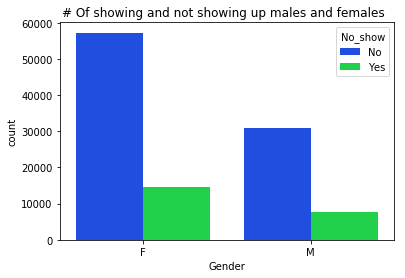

In [53]:
#does gender affect showing up?
sns.countplot(x=df.Gender,hue=df.No_show,palette='bright')
plt.title('# Of showing and not showing up males and females  ')

plt.show()

From this plot I found that Females are showing up much more than males but also females are not showing up more than males so, it's not obvious that gender has a strong relation to showing up 

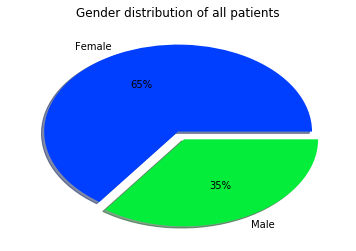

In [29]:
#Gender distribution of all patients
colors=sns.color_palette('bright')
labels=['Female','Male']
plt.pie(df.Gender.value_counts(),colors=colors,labels=labels,autopct = '%0.0f%%',shadow=True,explode=[0,0.1])
plt.title('Gender distribution of all patients')
plt.show()

65% of patients are females and 35% are males, let's find the percentage of no. of patients who show up in the next plot

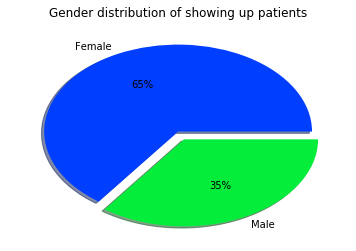

In [30]:
#Gender distribution of showing up patients only
colors=sns.color_palette('bright')
labels=['Female','Male']
plt.pie(df_show.Gender.value_counts(),colors=colors,labels=labels,autopct = '%0.0f%%',shadow=True,explode=[0,0.1])
plt.title('Gender distribution of showing up patients')
plt.show()

The percentage is the same so, the gender distribution of showing up patient and of non showing up patients is the same (Females 65:35 Males)

In [31]:
#Number of all females
females_count=df.Gender[df.Gender=='F'].value_counts()
females_count

F    71839
Name: Gender, dtype: int64

In [32]:
#Number of not showing up females
not_showing_females_count=df_noshow.Gender[df_noshow.Gender=='F'].value_counts()
not_showing_females_count

F    14594
Name: Gender, dtype: int64

In [33]:
#Percentage of not showing up females
percentage(not_showing_females_count,females_count)

F    20.314871
Name: Gender, dtype: float64

Here we find that 20% of females didn't show up for their appointments

In [34]:
#Number of all males
males_count=df.Gender[df.Gender=='M'].value_counts()
males_count

M    38687
Name: Gender, dtype: int64

In [35]:
#Number of not showing up males
not_showing_males_count=df_noshow.Gender[df_noshow.Gender=='M'].value_counts()
not_showing_males_count

M    7725
Name: Gender, dtype: int64

In [36]:
#Percentage of not showing up males
percentage(not_showing_males_count,males_count)

M    19.967948
Name: Gender, dtype: float64

Also about 20% of males didn't show up for their appointments

### Research Question 2  (What is the age distribution and does it affect showing up?)

Text(0.5,1,'age distribution boxplot')

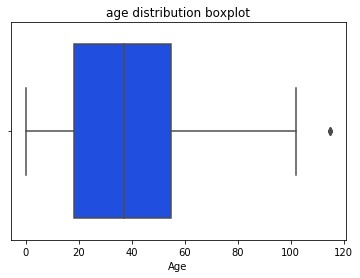

In [54]:
sns.boxplot(x=df.Age,palette='bright')
plt.title('age distribution boxplot')

The min age is 0, max age is 115, average age is 37

Text(0,0.5,'Avg. age')

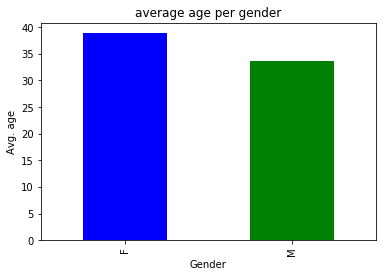

In [57]:
#average age per gender
df.groupby('Gender')['Age'].mean().plot(kind='bar',color=['blue','green'])
plt.title('average age per gender')
plt.ylabel('Avg. age')


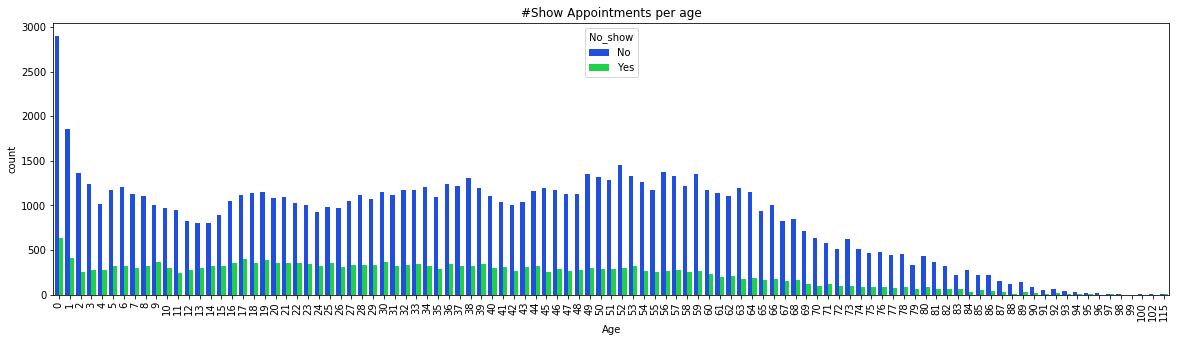

In [39]:
#Checking the ages of showing up patients
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(x=df.Age,hue=df.No_show,palette='bright').set_title("#Show Appointments per age")
plt.show()

From the last plot I found that there's no quite relation between age and showing up but I found that childerns younger than 6 years are more showing (parents taking care of their childerns) and patients aging between 45 and 65 are more showing than others  

### Research Question 3  (What are the most showing up neighbourhoods ?)

Text(0.5,1,'#Showing and non showing up patients per neighbourhood')

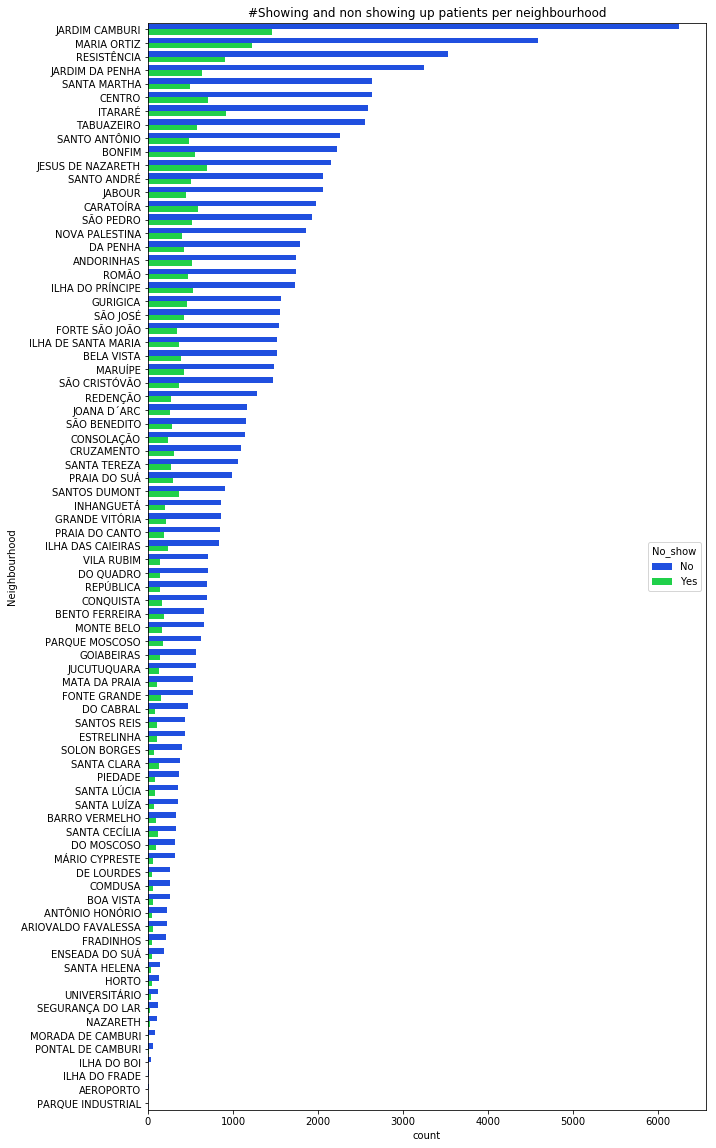

In [40]:
#Counts of showing and non showing patients in each neighbourhood ordered by the most showing up neighbourhoods
plt.figure(figsize=(10,20))
sns.countplot(y='Neighbourhood',data=df,hue=df.No_show,palette='bright',order=df_show.Neighbourhood.value_counts().index).set_title("#Showing and non showing up patients per neighbourhood")

### Research Question 4  (Does patients with more conditions(Diabetes,Hypertension,Handicap,Alcoholism) tend to show up more for appointments?)

Text(0.5,1,'# of showing and not showing up patients per # of conditions')

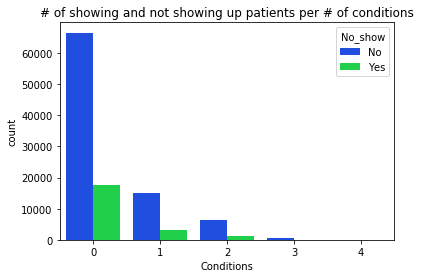

In [58]:
sns.countplot(x=df.Conditions,hue=df.No_show,palette='bright')
plt.title('# of showing and not showing up patients per # of conditions')

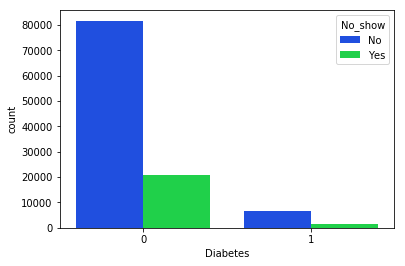

In [42]:
sns.countplot(x=df.Diabetes,hue=df.No_show,palette='bright')

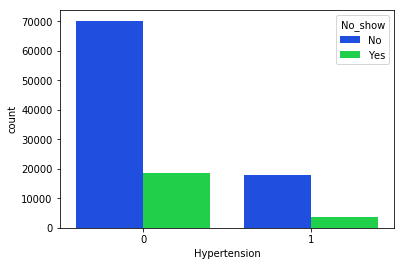

In [43]:
sns.countplot(x=df.Hypertension,hue=df.No_show,palette='bright')

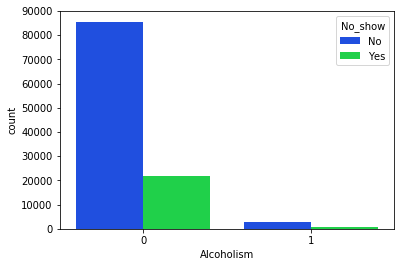

In [44]:
sns.countplot(x=df.Alcoholism,hue=df.No_show,palette='bright')

The majority of patients has 0 conditions and the number of patients decrease when the number of conditions increase.

### Research Question 5  (What is the most showing up Day of week?)

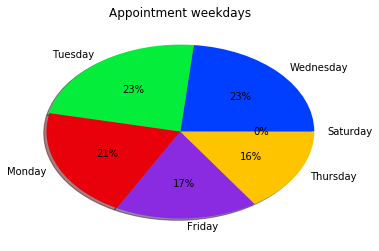

In [59]:
colors=sns.color_palette('bright')
labels=['Wednesday','Tuesday','Monday','Friday','Thursday','Saturday']
plt.pie(df.Appointment_DOW.value_counts(),colors=colors,labels=labels,autopct = '%0.0f%%',shadow=True)
plt.title('Appointment weekdays')
plt.show()

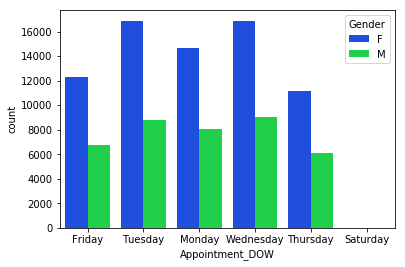

In [46]:
sns.countplot(x=df.Appointment_DOW,hue=df.Gender,palette='bright')

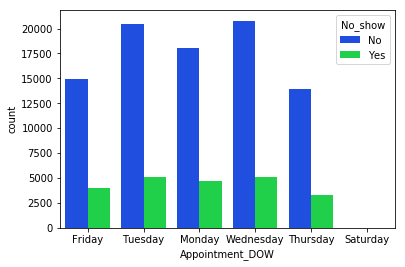

In [47]:
sns.countplot(x=df.Appointment_DOW,hue=df.No_show,palette='bright')

Whether patients are males or females they tend to show up more on Tuesdays and Wednesdays and they are not showing up on Saturdays or Sundays maybe it's the clinic's weekly day-off

### Research Question 6  (What is the average waiting days and does long waiting days have a negative effect on showing up?)

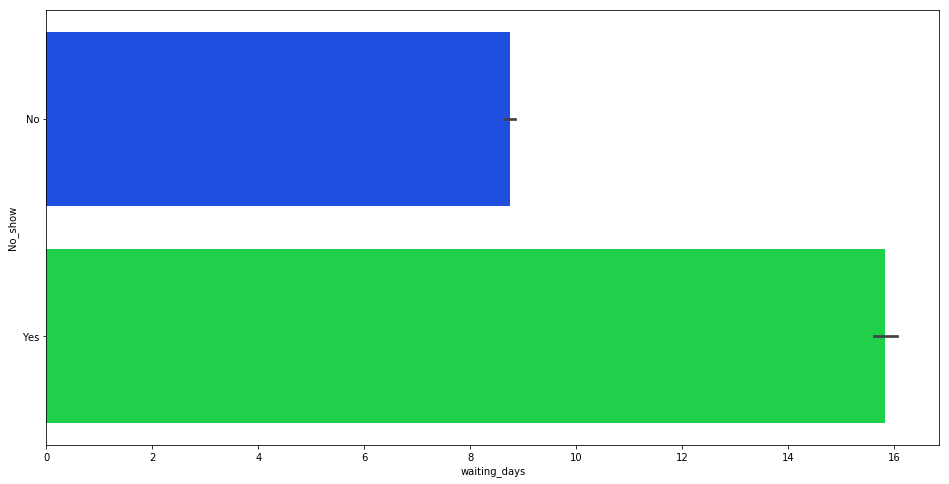

In [48]:
plt.figure(figsize=(16,8))
sns.barplot(x=df.waiting_days,y=df.No_show,palette='bright')


In [49]:
#Average waiting days
df.waiting_days.mean()

10.183793858458642

In [50]:
#Max waiting days
df.waiting_days.max()

179

Text(0.5,1,'waiting days distribution boxplot')

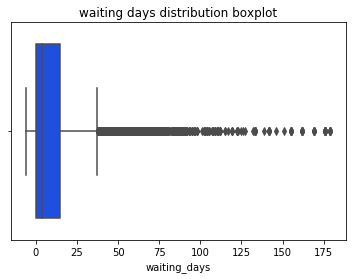

In [61]:
sns.boxplot(df.waiting_days,palette='bright')
plt.title('waiting days distribution boxplot')

The more the waiting days, the more likely the patient not showing up.

<a id='conclusions'></a>
## Conclusions

>Q1:Does gender affect showing up?

>I found that females were showing up much more than males, but that's because 65% of patients were females. So, I calculated the percentage of non-showing females, and I found that 20.3% of females didn't show up while, The percentage of non-showing males was slightly lower; it was 19.9%, so it doesn't seem that age affects showing up.

>Q2:What is the age distribution and does it affect showing up?

>The minimum age is 0, the max age is 115 which is possible and the average age is 37.

>Children less than 6 years are more likely to show up, and that's probably because their parents are taking care of them then, the number of patients increases again at the age of 50-60 then it decreases gradually

>Q3:What are the most showing up neighbourhoods ?

>The most showing up neighbourhoods are [Jardim camburi,Maria ortiz,Resistencia] and the least showing up are [Parque industrial,Aeroporto,Ilha do frade] but, We had a limitation in knowing the reason because our data lacks a distance feature from the clinic to each neighborhood.

>Q4:Does patients with more conditions(Diabetes,Hypertension,Handicap,Alcoholism) tend to show up more for appointments?

>I thought when patients have more than one condition it's more likely to show up, but the plot proved me wrong. 

>The majority of showing up patients were not suffering from any condition, and as the number of conditions increased, the number of showing up patients decreased.

>Most of patients were not suffering from diabetes,hypertension,alcoholism.

>Q5:What is the most showing up Day of week?

>46% of patients were more likely to show up on Tuesday and Wednesday equally, and also 33% of patients showed up on Thursday and Friday, 21% showed up on Monday, and no patients showed up on Saturdays or Sundays. Maybe it's the clinic's weekly day off.

>Q6:What is the average waiting days and does long waiting days have a negative effect on showing up?

>10 days was the average of waiting days, the longest waiting period was 179.

>There's an obvious negative relation between showing up and waiting days, as the waiting days increased the number of showing up patients decreased.





In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0